In [114]:
#Import the necessary modules
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt  

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib  inline 

In [115]:
#Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [116]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


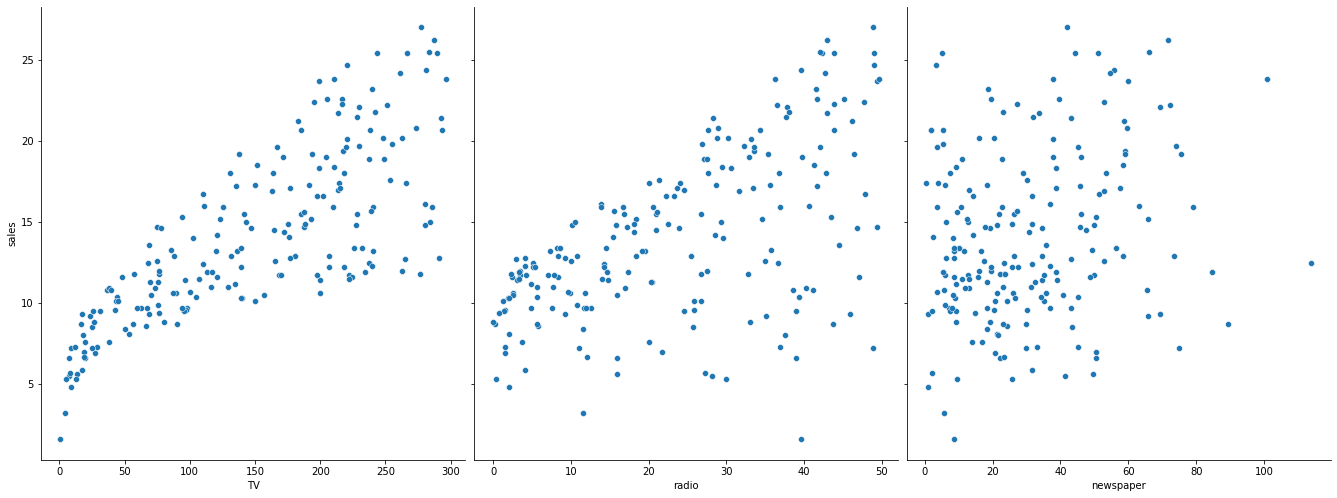

In [117]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7,aspect=0.9)

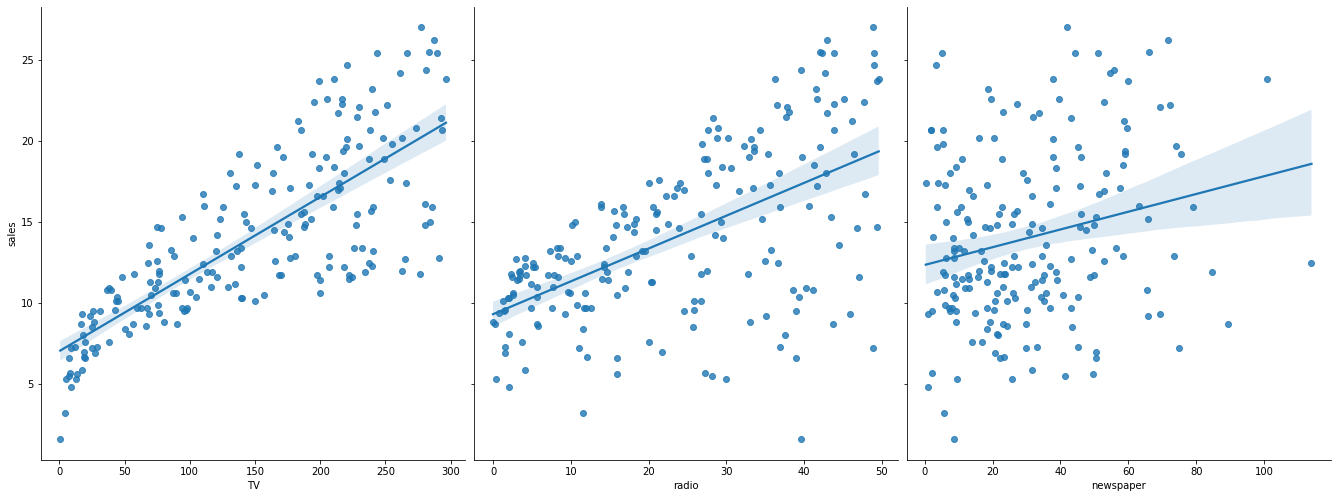

In [118]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7,aspect=0.9,kind='reg')

In [119]:
#Standardize the dataset
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
std_df = pd.DataFrame(standardized_data, columns=df.columns)
std_df

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [120]:
std_df.insert(0, 'All Ones', 1)
std_df

,All Ones,TV,radio,newspaper,sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [121]:
#Create a Train and Test Data
X = std_df[['All Ones','TV', 'radio','newspaper']]
y = std_df['sales']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.75, train_size=0.25)


In [122]:
lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

In [123]:
def MSE(y_hat, y):
    return np.sum(np.square(y_hat-y))/len(y)


REQUIRED FUNCTIONS 

In [126]:
def initialized_weights(X, random = False):
  X_len = X.shape[1]
  if random:
    return np.random.rand(X_len)
  return np.zeros(X_len)

def predict(X, weights):
  return np.dot(X, weights)

def compute_cost(X, y, weights):
  m = len(y)
  cost_function = 1/(2*m) * np.sum((predict(X, weights)-y)**2)
  return cost_function

def compute_gradient(X, y, weights):
  m = len(y)
  w = 1/m * np.dot(X.T, (predict(X, weights) - y))
  return w

def update_weights(X, y, weights, alpha):
  return weights-alpha*compute_gradient(X, y, weights)

def grad_descent(X, y, weights, alpha, iterations):
  weights_matrix = [0] * iterations
  cost_matrix = [0] * iterations

  for j in range(iterations):
    weights = update_weights(X, y, weights, alpha)
    weights_matrix[j] = weights
    cost = compute_cost(X, y, weights)
    cost_matrix[j] = cost
  return weights_matrix, cost_matrix

def plot_costs(array):
  plt.title('Cost over Iterations')
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.plot(array)  
  

TEST REQUIRED FUNCTIONS 

In [127]:
weights = initialized_weights(X_train, random = True)
print(weights)
weights = initialized_weights(X_train)
weights

[0.34737577 0.17037713 0.83970435 0.90286554]


array([0., 0., 0., 0.])

In [128]:
y_hat_train = predict(X_train, initialized_weights(X_train, random = True))
df_train = pd.DataFrame({'Real Values': y_train, 'Predicted Values': y_hat_train})
df_train.head(10)

,Real Values,Predicted Values
19,0.110964,-0.112178
152,0.495254,-0.039899
52,1.648126,1.833197
18,-0.523115,-0.737919
88,-0.215683,1.808126
49,-0.830548,-0.351367
113,0.360753,-0.219006
79,-0.580759,-0.778441
54,1.186977,0.629736
98,2.186132,2.757388


In [129]:
cost_computation = compute_cost(X_train, y_train, initialized_weights(X_train, random = True))
cost_computation

0.4100553921961695

In [130]:
weights = initialized_weights(X_train, random = True)
train_y_hat = predict(X_train, weights)
train_y_hat_df = pd.DataFrame({'Real Values': y_train, 'Predicted Values': y_hat_train})
train_y_hat_df.head(10)


,Real Values,Predicted Values
19,0.110964,-0.112178
152,0.495254,-0.039899
52,1.648126,1.833197
18,-0.523115,-0.737919
88,-0.215683,1.808126
49,-0.830548,-0.351367
113,0.360753,-0.219006
79,-0.580759,-0.778441
54,1.186977,0.629736
98,2.186132,2.757388


In [131]:
train_cost = compute_cost(X_train, y_train, weights)
train_cost

0.507943775876672

In [132]:
weights = initialized_weights(X_test, random = True)
test_y_hat = predict(X_test, weights)
test_y_hat_df = pd.DataFrame({'Real Values': y_train, 'Predicted Values': y_hat_train})
test_y_hat_df['Residual Values'] = test_y_hat_df['Real Values']-test_y_hat_df['Predicted Values']
test_y_hat_df.head(10)

,Real Values,Predicted Values,Residual Values
19,0.110964,-0.112178,0.223142
152,0.495254,-0.039899,0.535153
52,1.648126,1.833197,-0.185072
18,-0.523115,-0.737919,0.214804
88,-0.215683,1.808126,-2.023809
49,-0.830548,-0.351367,-0.479181
113,0.360753,-0.219006,0.579759
79,-0.580759,-0.778441,0.197682
54,1.186977,0.629736,0.557241
98,2.186132,2.757388,-0.571255


In [133]:
test_cost = compute_cost(X_test, y_test, weights)
test_cost

0.19783674009009797

Text(0.1, 0.1, 'MSE: 0.046353595904403626')

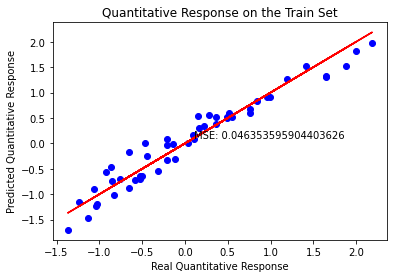

In [134]:
weights = initialized_weights(X_train, random = True)
alpha1 = 0.001
weights_matrix_training, cost_matrix_training = grad_descent(X_train, y_train, weights, alpha = 0.001, iterations = 10000)
train_y_hat = predict(X_train, weights_matrix_training[-1])

plt.title('Quantitative Response on the Train Set')
plt.scatter(y_train, train_y_hat, color='blue')
plt.plot(y_train, y_train, color='red')
plt.xlabel('Real Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.text(0.1, 0.10,f"MSE: {MSE(y_train, train_y_hat)}", color = 'black')



Text(0.1, 0.1, 'MSE: 0.046353595904403626')

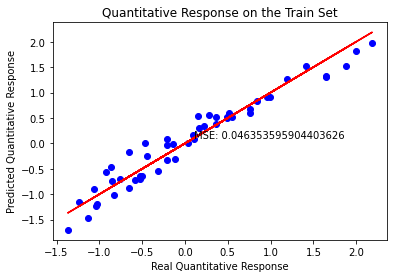

In [135]:
weights_matrix_testing, cost_matrix_testing = grad_descent(X_test, y_test, weights, alpha = 0.001, iterations = 10000)
test_y_hat = predict(X_test, weights_matrix_training[-1])

plt.title('Quantitative Response on the Train Set')
plt.scatter(y_train, train_y_hat, color='blue')
plt.plot(y_train, y_train, color='red')
plt.xlabel('Real Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.text(0.1,0.10,f"MSE: {MSE(y_train, train_y_hat)}", color = 'black')


In [136]:
std_df['Predicted Sales'] = predict(std_df[['All Ones', 'TV', 'radio', 'newspaper']], weights_matrix_training[-1])

std_df['TV'] = std_df['TV'] * df['TV'].std() + df['TV'].mean()
std_df['radio'] = std_df['radio'] * df['radio'].std() + df['radio'].mean()
std_df['newspaper'] = std_df['newspaper'] * df['newspaper'].std() + df['newspaper'].mean()
std_df['sales'] = std_df['sales'] * df['sales'].std() + df['sales'].mean()
std_df['Predicted Sales'] = std_df['Predicted Sales'] * df['sales'].std() + df['sales'].mean()


In [137]:
std_df['Residuals'] = std_df['sales'] - std_df['Predicted Sales']
std_df


,All Ones,TV,radio,newspaper,sales,Predicted Sales,Residuals
0,1,230.308426,37.836477,69.296979,22.120270,20.878116,1.242154
1,1,44.242678,39.340241,45.136502,10.390910,12.663214,-2.272304
2,1,16.874171,45.956803,69.397230,9.288149,12.666756,-3.378607
3,1,151.511186,41.345260,58.570128,18.511236,17.905304,0.605932
4,1,180.884712,10.768723,58.469877,12.897183,13.828635,-0.931452
...,...,...,...,...,...,...,...
195,1,37.926869,3.650906,13.757957,7.583883,5.978099,1.605784
196,1,94.067396,4.853917,8.043654,9.689153,8.711399,0.977754
197,1,177.075176,9.264959,6.339388,12.796932,13.237785,-0.440852
198,1,283.942679,42.047016,66.289451,25.528802,24.037617,1.491185


Text(0.5, 1.0, 'Cost function number of iterations')

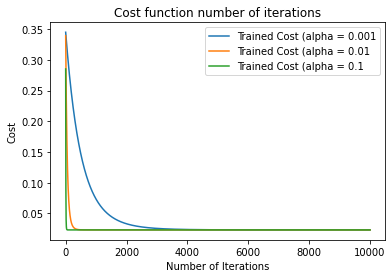

In [138]:
weights_matrix_training2, cost_matrix_training2 = grad_descent(X_train, y_train, weights, alpha = 0.01, iterations = 10000)
weights_matrix_training3, cost_matrix_training3 = grad_descent(X_train, y_train, weights, alpha = 0.1, iterations = 10000)

plt.plot(cost_matrix_training, label ='Trained Cost (alpha = 0.001')
plt.plot(cost_matrix_training2, label ='Trained Cost (alpha = 0.01')
plt.plot(cost_matrix_training3, label ='Trained Cost (alpha = 0.1')

plt.legend()
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.title("Cost function number of iterations")

Text(0.5, 1.0, 'Cost function in number of iterations')

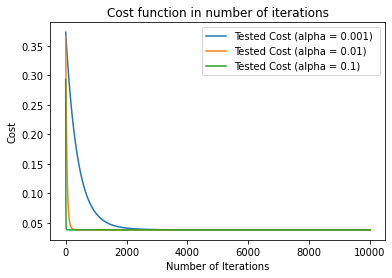

In [ ]:
weights_matrix_testing2, cost_matrix_testing2 = grad_descent(X_test, y_test, weights, alpha = 0.01, iterations = 10000)
weights_matrix_testing3, cost_matrix_testing3 = grad_descent(X_test, y_test, weights, alpha = 0.1, iterations = 10000)

plt.plot(cost_matrix_testing, label ='Tested Cost (alpha = 0.001) ')
plt.plot(cost_matrix_testing2, label ='Tested Cost (alpha = 0.01) ')
plt.plot(cost_matrix_testing3, label ='Tested Cost (alpha = 0.1) ')

plt.legend()
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.title("Cost function in number of iterations")

QUESTIONS:

1. What are the optimal weights found by your implemented gradient descent? Plug it into 
the linear model:

In [158]:
w = initialized_weights(X_train)

weights, cost = grad_descent(X_train, y_train, w, alpha=0.01, iterations = 100000 )
optimal_weights = weights[-1]

print(f"The Optimal Weights are: {optimal_weights}")

The Optimal Weights are: [0.07739485 0.74353413 0.50377545 0.01136577]


In [ ]:
A = f"{optimal_weights[0]}"
B = f" + {optimal_weights[1]}*TV"
C = f" + {optimal_weights[2]}*Radio"
D = f" + {optimal_weights[3]}*Newspaper"

print("hΘ(x) = ",A,B,C,D)

2. Provide a scatter plot of the 1�
5(,)2 ��� �(() for both the train and test set. Is there a 
trend? Provide an r2 score (also available in sklearn).

Text(0, 0.5, 'Predicted Values')

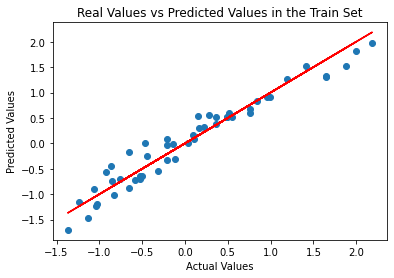

In [140]:
#Predict values in the training set
predict_training = predict(X_train, optimal_weights)
plt.title('Real Values vs Predicted Values in the Train Set')
plt.scatter(y_train, predict_training)
plt.plot(y_train,y_train, color='Red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



Text(0, 0.5, 'Predicted Values')

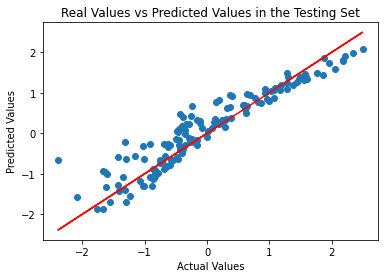

In [141]:
#Predict values in the testing set
predict_testing = predict(X_test, optimal_weights)
plt.title('Real Values vs Predicted Values in the Testing Set')
plt.scatter(y_test, predict_testing)
plt.plot(y_test,y_test, color='Red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [142]:
print(f"The r2 score for the training set is: {r2_score(y_train, predict_training)}")
print(f"The r2 score for the testing set is: {r2_score(y_test, predict_testing)}")

The r2 score for the training set is: 0.942681547421958
The r2 score for the testing set is: 0.8766050484276058


2. What happens to the error, r2, and cost as the number of iterations increase? Show your 
data and proof. You can alternatively plot your result data for visualization and check 
until 50000 iterations or more (actually).

([<matplotlib.axis.XTick at 0x7f89a1c45fd0>,
 <a list of 10 Text major ticklabel objects>)

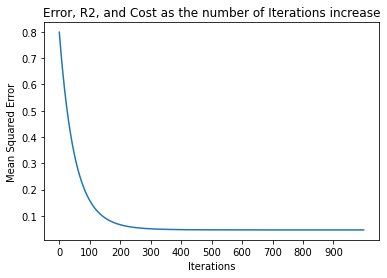

In [161]:
array = []
iterations = 50000
for i in range(iterations):
  mean_squared_error = MSE(y_train, predict(X_train, weights[i]))
  array.append(mean_squared_error)

plt.title('Error, R2, and Cost as the number of Iterations increase')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.plot(array[0:1000])
plt.xticks(np.arange(0, 1000, 100))


([<matplotlib.axis.XTick at 0x7f89a1b6ba90>,
 <a list of 10 Text major ticklabel objects>)

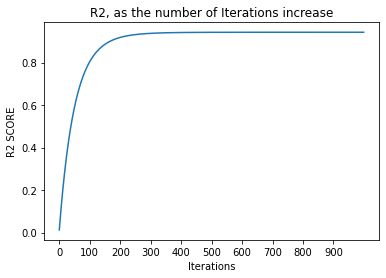

In [164]:
array = []
for i in range(iterations):
  r2 = r2_score(y_train, predict(X_train, weights[i]))
  array.append(r2)

plt.title('R2, as the number of Iterations increase')
plt.xlabel('Iterations')
plt.ylabel('R2 SCORE')
plt.plot(array[0:1000])
plt.xticks(np.arange(0, 1000, 100))